Graficos a mostrar para mi memoire. 

Empezaremos con la evolucion de los precios para el WTI y Brent

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from arch.unitroot import engle_granger
from statsmodels.tsa.stattools import coint

from matplotlib import rcParams
import cufflinks as cf
import yfinance as yf
import plotly.express as px

cf.set_config_file(theme='white',offline=True)
df = pd.DataFrame(columns = ["Brent", "WTI"])
df["Brent"]= yf.download("BZ=F")["Close"]
df["WTI"]= yf.download("CL=F")["Close"]

fig = fig = px.area(
    df, 
    title = "Price Evolution for Brent vs. WTI as of 08/20/22")


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [26]:
df_correlation = pd.DataFrame(columns = ["Correlation"])
df_correlation["Correlation"] = (df['Brent'].rolling(30).corr(df['WTI']).dropna() *100).round(1)
df_correlation.max()

Correlation    99.9
dtype: float64

In [37]:
fig = px.line(df_correlation,
              y = "Correlation",
             title = "Correlation on a 30D Lookback Window",
             template = "simple_white"
             )
fig['data'][0]['line']['color']='#5800FF'
fig['data'][0]['line']['width']=2
fig.add_shape(type = "line",
              line_color = "salmon",
              line_width = 3,
              line_dash = "dot",
              opacity = 1, 
              x0 = 0,
              x1 = 1, 
              xref = "paper",
              y0 = 50, 
              y1 = 50, 
              yref = "y"
             )
fig.show()

<AxesSubplot:xlabel='Date'>

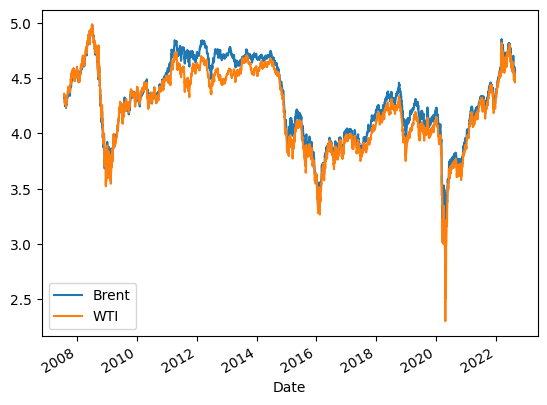

In [49]:
df_correlation.mean()
mask = np.logical_and(df["Brent"] > 0, df["WTI"] > 0 )
log_price = np.log(df[mask])
log_price.plot()

Now let us test for the cointegration of logarithm of WTI and Brent prices. 

In [53]:
eg_test = engle_granger(log_price["Brent"], log_price["WTI"], trend = "n")
eg_test

Test Statistic,-4.523
P-value,0.000
ADF Lag length,3
Estimated Root ρ (γ+1),0.984


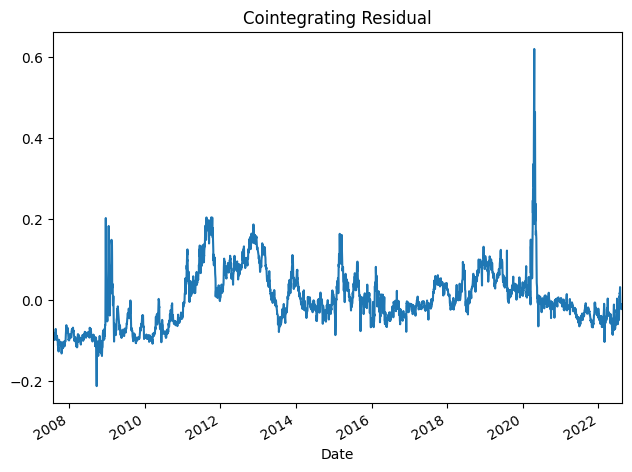

In [54]:
fig = eg_test.plot()

In [55]:
eg_test.cointegrating_vector

Brent    1.000000
WTI     -1.016702
dtype: float64

In [62]:
t = coint(log_price["Brent"], log_price["WTI"])[0]
p = coint(log_price["Brent"], log_price["WTI"])[1]
k = coint(log_price["Brent"], log_price["WTI"])[2]
print(f"T-statistic: {t} and p-value: {p} key values: {k}")

T-statistic: -3.635001773286012 and p-value: 0.022161109854894976 key values: [-3.89937621 -3.33776727 -3.04558633]
